# Data Import and Loading

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

customers = pd.read_json("dim_customer.json")
invoices = pd.read_csv("fct_invoice.csv")

customers.head()
invoices.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


# Easy

## Q1: How many unique customers are in the dataset?

In [10]:
unique_customers = customers["id"].nunique()
unique_customers

5191

## Q2: What are the different categories of products available? How many unique categories are there?


In [11]:
categories = invoices["category"].unique()
num_categories = invoices["category"].nunique()
categories, num_categories

(array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
        'Toys', 'Technology', 'Souvenir'], dtype=object),
 8)

## Q3: Which payment method is the most popular? How many times was it used?


In [12]:
payment_counts = invoices["payment_method"].value_counts()
payment_counts.head(1)

payment_method
Cash    44447
Name: count, dtype: int64

# Medium

## Q1: What are the three most popular categories, by total sales?

In [13]:
top_categories = invoices.groupby("category")["price"].sum().sort_values(ascending=False).head(3)
top_categories

category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64

## Q2: What are the total sales attributed to customers over the age of 45?

In [14]:
merged = invoices.merge(customers, left_on="customer_id", right_on="id", how="left")

# Sum sales for customers over 45
sales_over_45 = merged.loc[merged["age"] > 45, "price"].sum()
sales_over_45


np.float64(22370553.269999996)

## Q3. How is the data distributed across different invoice dates? Are there seasonal trends or patterns? (Graph)

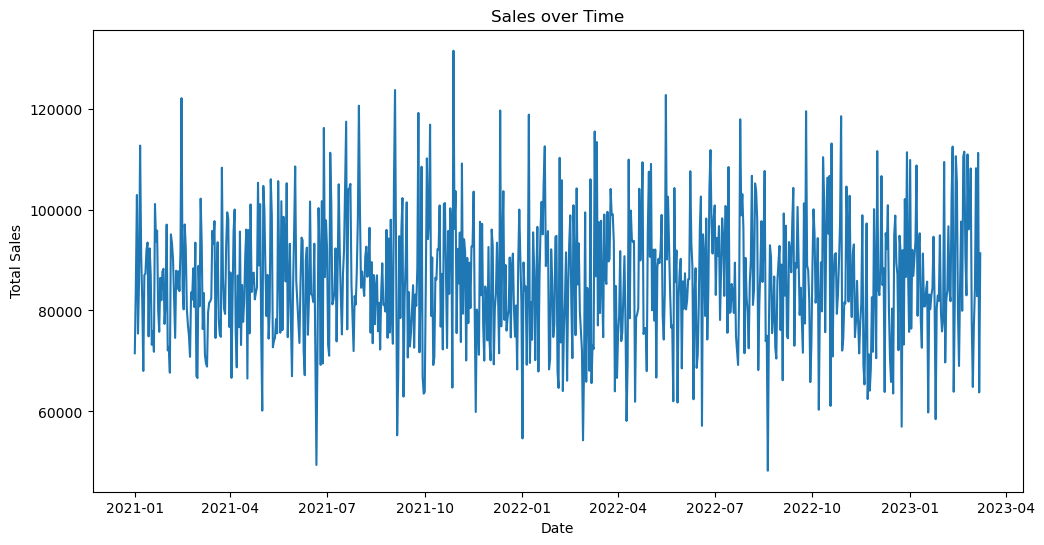

In [15]:
invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"], dayfirst=True)

sales_by_date = invoices.groupby("invoice_date")["price"].sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title("Sales over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


# Hard

## Q1. Create a pivot table showing the breakdown of sales across: category, decade age range (10–19, 20–29, etc.)

In [16]:
merged["age_decade"] = (merged["age"] // 10) * 10

pivot = merged.pivot_table(
    values="price",      
    index="category",
    columns="age_decade",
    aggfunc="sum",
    fill_value=0
)

pivot


age_decade,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0
category,,,,,,,,
Books,3469.35,21619.05,22997.70,23361.30,20664.60,21513.00,15437.85,7575.00
Clothing,518238.16,2818351.36,3074919.76,3066817.60,2803647.44,2910776.00,2117064.40,1228827.60
Cosmetics,29681.80,165079.60,198054.86,181343.60,160932.28,176627.04,114132.62,71236.32
Food & Beverage,3645.31,20428.38,23744.20,24460.71,19999.52,22190.89,14968.26,8561.51
Shoes,274277.69,1630061.72,1912141.62,1889335.16,1591650.84,1618058.32,1210542.89,708200.60
Souvenir,3296.13,15295.92,17548.08,17759.22,15084.78,15331.11,10592.19,6545.34
Technology,287700.00,1426950.00,1669500.00,1630650.00,1220100.00,1529850.00,977550.00,548100.00
Toys,17203.20,102466.56,115297.28,106910.72,94115.84,100244.48,74475.52,43043.84
